# Tutorial: Uso de DataFrames para manejar valores de acciones y predicción de precios con Scikit-Learn

En este tutorial, aprenderemos cómo utilizar DataFrames de pandas para manejar datos de valores de acciones y cómo usar Scikit-Learn para hacer una predicción simple de precios de acciones.

## Instalación de bibliotecas necesarias

Primero, instalemos las bibliotecas necesarias. Podemos usar `pandas` para manejar los datos y `scikit-learn` para crear el modelo de predicción.

In [29]:
!pip install pandas scikit-learn


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: c:\users\pebus\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip


## Importación de bibliotecas

Importemos las bibliotecas necesarias para este tutorial.

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Carga de datos de valores de acciones

Para este tutorial, usaremos datos ficticios de valores de acciones. En un escenario real, podrías obtener estos datos de una API financiera o de un archivo CSV.

In [31]:

!pip install pandas yfinance



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: c:\users\pebus\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip


In [32]:

import yfinance as yf
import pandas as pd

# Definir el ticker de la acción y el rango de fechas
ticker = 'AAPL'  # Por ejemplo, acciones de Apple
start_date = '2022-01-01'
end_date = '2023-01-01'

# Descargar los datos
df = yf.download(ticker, start=start_date, end=end_date)

# Mostrar las primeras filas del dataframe
df.head()
df.reset_index(inplace=True)
print(df.columns)

[*********************100%%**********************]  1 of 1 completed

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


## Visualización de los datos

Es útil visualizar los datos para entender mejor su comportamiento antes de hacer cualquier análisis o modelado.

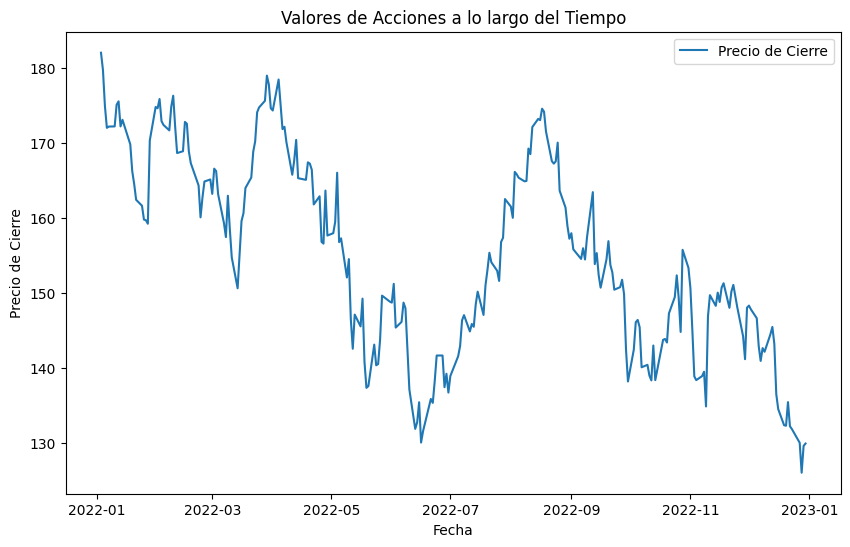

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'], label='Precio de Cierre')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.title('Valores de Acciones a lo largo del Tiempo')
plt.legend()
plt.show()

## Preparación de los datos para el modelado

Para hacer una predicción de precios, necesitamos preparar nuestros datos. En este caso, utilizaremos el precio de cierre de los días anteriores para predecir el precio de cierre del día siguiente.

In [35]:
df['Precio_Anterior'] = df['Close'].shift(1)
df = df.dropna()

X = df[['Precio_Anterior']]
y = df['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Creación y entrenamiento del modelo

Usaremos una regresión lineal simple para predecir el precio de cierre basado en el precio de cierre del día anterior.

In [36]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Evaluación del modelo

Evaluemos el modelo utilizando el conjunto de prueba y calculemos el error cuadrático medio (MSE).

In [37]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Error Cuadrático Medio: {mse}')

Error Cuadrático Medio: 11.54991187691172


## Visualización de las predicciones

Finalmente, visualicemos las predicciones del modelo comparadas con los valores reales.

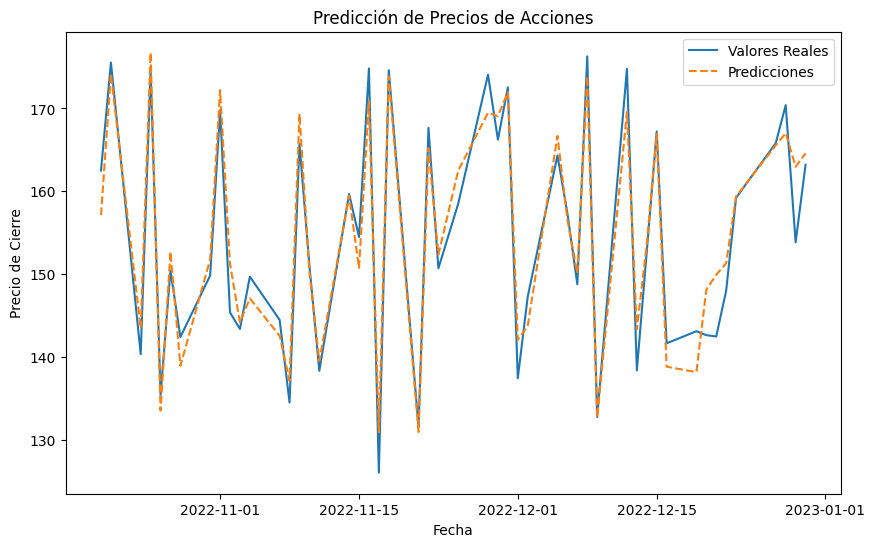

In [38]:
plt.figure(figsize=(10, 6))
plt.plot(df['Date'][-len(y_test):], y_test, label='Valores Reales')
plt.plot(df['Date'][-len(y_test):], y_pred, label='Predicciones', linestyle='--')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.title('Predicción de Precios de Acciones')
plt.legend()
plt.show()

¡Y eso es todo! Hemos aprendido cómo manejar datos de valores de acciones usando pandas y cómo hacer una predicción simple de precios de acciones usando Scikit-Learn.